# K-means (implementation)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

### Date loading

In [23]:
data = pd.read_excel('C:\\Users\\Galia\\desktop\\wine2.xlsx')
X = data[['Alcogol', 'OD OD280/OD315 of diluted wines']]
# print(X)
X = X.as_matrix()

### Hand writing functions 

In [ ]:
#### For every point we count the distances to each centroid and choose  the min one
#### So we classified points to their clusters
#### Make the dictionary with the groups\` numbers as keys and their points respectively
#### Return this dictionaries with points

In [2]:
def cl_points(X, center):
    n = X.shape[0]
    clusters  = {}
    all_dist = []
    for x in X:
        _C = []
        for point in enumerate(center):
            dist = np.linalg.norm(x - center[point[0]])
            Npoint_dist = (point[0], dist)
            _C.append(Npoint_dist)
        all_dist.append(_C)
        
    min_dist = list(range(n))

    for i in range(n):
        min_dist[i] = min(all_dist[i], key = lambda x: x[1])[0]

    for i in range(n):
        try:
            clusters[min_dist[i]].append(X[i])
        except KeyError:
            clusters[min_dist[i]] = [X[i]]
    return clusters

In [ ]:
#### Calculate new centroids as average distance in every clusters respectively
#### Return list with new coordinates of centroids

In [3]:
def new_center(clusters):
    new_cent = []
    for k in sorted(clusters.keys()):
        c_mean = np.mean(clusters[k], axis = 0)
        new_cent.append(c_mean)
    return(new_cent)

In [ ]:
#### Check if two sets of centroids\` coordinates are equal

In [4]:
def ident(center2, center):
    S1 = set([tuple(i) for i in center])
    S2 = set([tuple(i) for i in center2])
    return S1 == S2

In [ ]:
#### Define two numpy arrays of centroids (centroids are rendom points from dataset)
#### Create some first clusters
#### Count new centroids
#### Repeat creating and counting until centroids won\'t be equal

In [18]:
def f_centers(X, K):
    n = X.shape[0]
    rng = np.random.RandomState(2)
    i1 = rng.permutation(n)[: 3]
    i2 = rng.permutation(n)[: 3]
    c2 = X[i1]
    c = X[i2]
    while not ident(c, c2):
        c2 = c
        clusters = cl_points(X, c)
        c = new_center(clusters)
    return([c, clusters])

# Checking on dataset

In [19]:
my_kmeans = f_centers(X, 3)

In [ ]:
### Just for convinients in later vizualization convert list of np.arrays into np.arrays of lists

In [24]:
cc = list(range(3))
for i in range(len(my_kmeans[0])):
    cc[i] = my_kmeans[0][i].tolist()
    
kcenters = np.array(cc)
print(kcenters)

[[ 13.07898305   1.74983051]
 [ 12.07981818   2.90290909]
 [ 13.7196875    3.1559375 ]]


In [ ]:
### Function returns dictionary of clusters
### For convinient visualization convert dictionary into np.array 
### which has numbers of clasters in corresponding place for each observation

In [25]:
KY = list(range(X.shape[0]))
for j in range(len(my_kmeans[1][0])):
    for i in range(X.shape[0]):
        if X[i][0] == my_kmeans[1][0][j][0] and X[i][1] == my_kmeans[1][0][j][1]:
            KY[i] = 3

for j in range(len(my_kmeans[1][1])):
    for i in range(X.shape[0]):
        if X[i][0] == my_kmeans[1][1][j][0] and X[i][1] == my_kmeans[1][1][j][1]:
            KY[i] = 2
for j in range(len(my_kmeans[1][2])):
    for i in range(X.shape[0]):
        if X[i][0] == my_kmeans[1][2][j][0] and X[i][1] == my_kmeans[1][2][j][1]:
            KY[i] = 1
KYmeans = np.array(KY)

### Graphical illustrations 

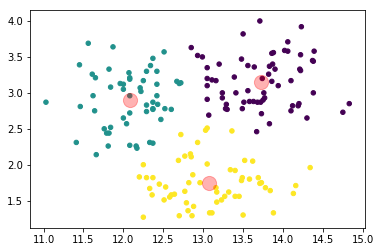

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=KY, cmap='viridis', s = 20)
plt.scatter(kcenters[:, 0], kcenters[:, 1], c='red', s=200, alpha=0.3)
plt.show()

### Python\`s claster\`s classification

In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
# print(y_kmeans)
# print(Y)

In [ ]:
### Compare final centroids

In [33]:
centers = kmeans.cluster_centers_
print('sklearn center \n {0} \n my center \n {1}'.format(centers, kcenters))

sklearn cenaater 
 [[ 13.71415385   3.14538462]
 [ 13.07413793   1.73741379]
 [ 12.07981818   2.90290909]] 
 my center 
 [[ 13.07898305   1.74983051]
 [ 12.07981818   2.90290909]
 [ 13.7196875    3.1559375 ]]


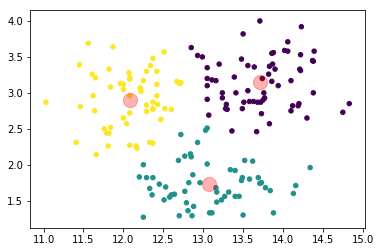

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s = 20)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.3)
plt.show()